In [1]:
"""
QUESTION 1
"""
print("----------- QUESTION 1 -----------")
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt

# load data
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 
              'rec.autos', 'rec.motorcycles', 
              'rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, 
                             shuffle=True, random_state=42)

# define stop_words and vectorizer
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = text.CountVectorizer(min_df=3, stop_words=stop_words)

# get the TF matrix
X_counts = vectorizer.fit_transform(dataset.data)
X_counts.toarray()

# TF-IDF matrix
X_tfidf = text.TfidfTransformer().fit_transform(X_counts)
print ("The dimension of the TF-IDF matrix is ",X_tfidf.shape)

----------- QUESTION 1 -----------
The dimension of the TF-IDF matrix is  (7882, 27768)


In [2]:
# Plot the contingency table
def plot_contingency_table(cm, classes, normalize=False, title='Contingency Table', cmap=plt.cm.Blues):
    """
    This function prints and plots the contingency table.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized contingency table")
    else:
        print('contingency table')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
"""
QUESTION 2
"""
"""
print("----------- QUESTION 2 -----------")

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# assign labels to data
num_data = len(dataset.target)
y = [0 if dataset.target[i] < 4 else 1 for i in range(num_data)]

# train a KMeans classifier
kmeans_clf = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0)

# use k-means to predict the label for each data
y_pred = kmeans_clf.fit_predict(X_tfidf)

# report contingency table
print("the contingency table is \n",confusion_matrix(y,y_pred))

# plot the contingency table
classes = ["class1","class2"]
plt.figure()
plot_contingency_table(kmeans_clf, classes, normalize=False, title='Contingency Table')
plt.show()
"""

----------- QUESTION 2 -----------


KeyboardInterrupt: 

In [ ]:
"""
QUESTION 3
"""
"""
print("----------- QUESTION 3 -----------")

# evaluate clustering scores
print("Homogeneity: ",metrics.homogeneity_score(y,y_pred))
print("Completeness: ",metrics.completeness_score(y,y_pred))
print("V-measure: ",metrics.v_measure_score(y,y_pred))
print("adjusted Rand Index: ",metrics.adjusted_rand_score(y,y_pred))
print("adjusted mutual information score: ",metrics.adjusted_mutual_info_score(y,y_pred))
"""

----------- QUESTION 4 -----------


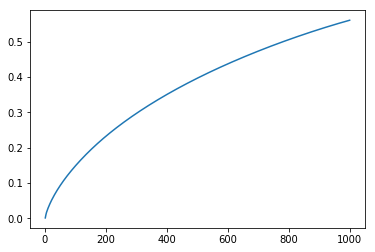

In [4]:
"""
QUESTION 4
"""
print("----------- QUESTION 4 -----------")

from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix

n = 1000
svd = TruncatedSVD(n_components=n, random_state=42)
X_tfidf_svd = svd.fit_transform(X_tfidf)  

x = range(1, n+1)
y = [(sum(svd.explained_variance_ratio_[:k])) for k in range(1,n+1)]

fig,ax = plt.subplots()
plt.xlim(1, 1000)
plt.ylim(0, 0.7)
plt.plot(x, y)
plt.show() 

----------- QUESTION 5 -----------


C:\Users\nobod\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\nobod\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\nobod\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\nobod\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use a

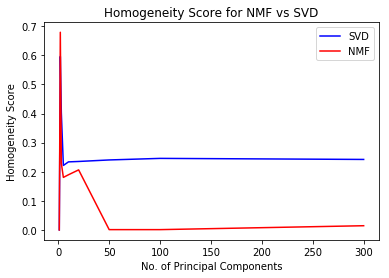

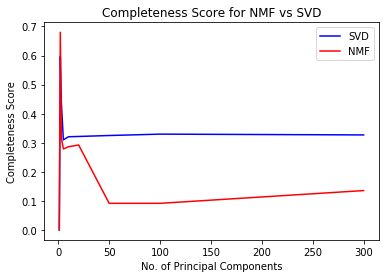

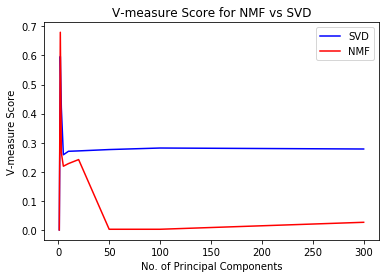

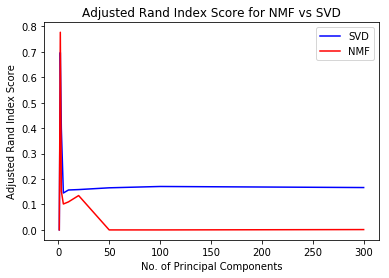

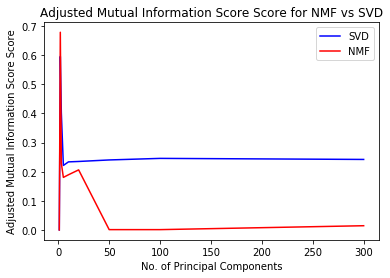

In [58]:
"""
QUESTION 5
"""
print("----------- QUESTION 5 -----------")



def selectColumns(matrix, cols):
    selected_cols = []
    for i in range(0, cols+1):
        selected_cols = np.append(selected_col, np.transpose(np.asarray([matrix[:,i]])), axis=1)
    return selected_cols

from sklearn.decomposition import NMF

# LSI dimensionality reduction
svd = TruncatedSVD(n_components=300, random_state=42) 
X_SVD = svd.fit_transform(X_tfidf)
#X_test_LSI = lsi.transform(X_test_tfidf)

# assign labels to data
num_data = len(dataset.target)
y = [0 if dataset.target[i] < 4 else 1 for i in range(num_data)]

# train a KMeans classifier
kmeans_clf = KMeans(n_clusters=2, n_init=50, max_iter=1500, random_state=0)

homogeneity_NMF, homogeneity_SVD, completeness_NMF, completeness_SVD, v_measure_NMF, v_measure_SVD  = ([] for i in range(6)) 
adjusted_rand_NMF, adjusted_rand_SVD, adjusted_mutual_NMF, adjusted_mutual_SVD = ([] for i in range(4))

r = [1, 2, 3, 5, 10, 20, 50, 100, 300]
for i in r:

    # NMF dimensionality reduction
    nmf = NMF(n_components=i, random_state=42)
    X_NMF = nmf.fit_transform(X_tfidf)

    # use k-means to predict the label for each data
    y_pred_NMF = kmeans_clf.fit_predict(X_NMF)
    
    #******************************************
    #******************************************
    ## CHANGE THIS LINE TO TAKE THE i first columns!!!! (ant not the ith column)
    
    #X_SVD_curr = selectColumns(X_SVD, i-1) 
    y_pred_SVD = kmeans_clf.fit_predict(X_SVD[:,range(0,i)])
    

    homogeneity_NMF.append(metrics.homogeneity_score(y,y_pred_NMF))
    homogeneity_SVD.append(metrics.homogeneity_score(y,y_pred_SVD))

    completeness_NMF.append(metrics.completeness_score(y,y_pred_NMF))
    completeness_SVD.append(metrics.completeness_score(y,y_pred_SVD))

    v_measure_NMF.append(metrics.v_measure_score(y,y_pred_NMF))
    v_measure_SVD.append(metrics.v_measure_score(y,y_pred_SVD))

    adjusted_rand_NMF.append(metrics.adjusted_rand_score(y,y_pred_NMF))
    adjusted_rand_SVD.append(metrics.adjusted_rand_score(y,y_pred_SVD))

    adjusted_mutual_NMF.append(metrics.adjusted_mutual_info_score(y,y_pred_NMF))
    adjusted_mutual_SVD.append(metrics.adjusted_mutual_info_score(y,y_pred_SVD))

    
    
# y1 is for SVD and y2 for NMF
def plotMetric(r, y1, y2, score_name):
    fig,ax = plt.subplots()
    line_a, = plt.plot(r, y1, 'b', label='SVD') 
    line_b, = plt.plot(r, y2, 'r', label='NMF')
    plt.legend(handles=[line_a, line_b])
    plt.xlabel('No. of Principal Components')
    plt.ylabel('{} Score'.format(score_name))
    plt.title('{} Score for NMF vs SVD'.format(score_name))
    plt.show()

    

plotMetric(r, homogeneity_SVD, homogeneity_NMF, 'Homogeneity')	
plotMetric(r, completeness_SVD, completeness_NMF, 'Completeness')	
plotMetric(r, v_measure_SVD, v_measure_NMF, 'V-measure')	
plotMetric(r, adjusted_rand_SVD, adjusted_rand_NMF, 'Adjusted Rand Index')	
plotMetric(r, adjusted_mutual_SVD, adjusted_mutual_NMF, 'Adjusted Mutual Information Score')	


In [ ]:
plt.figure(1)
plt.xlim(-10, 300)
plt.ylim(0, 1)
plt.title('5 measure scores of the Kmeans with SVD reduction')
plt.xlabel('No. of Principal Components')
plt.ylabel('Measure scores')
plt.plot(r, homogeneity_SVD, 'o', r, completeness_SVD, 'y', r, v_measure_SVD, 'k', 
         r, adjusted_rand_SVD, 'c', r, adjusted_mutual_SVD,'m', linewidth=1.5)
plt.legend(('Homogeneity', 'Completeness', 'V-measure', 'Adjusted rand', 'Adjusted mutual info'), loc='upper right')
plt.show()


plt.figure(2)
plt.xlim(-10, 300)
plt.ylim(0, 1)
plt.title('5 measure scores of the Kmeans with NMF reduction')
plt.xlabel(r'$\gamma$')
plt.ylabel('5 measure scores')
plt.plot(r, homogeneity_NMF, 'o', r, completeness_NMF, 'y', r, v_measure_NMF, 'k', 
         r, adjusted_rand_NMF, 'c', r, adjusted_mutual_NMF, 'm', linewidth=1.5)
plt.legend(('Homogeneity', 'Completeness', 'V-measure', 'Adjusted rand', 'Adjusted mutual info'), loc='upper right')
plt.show()

In [ ]:
"""
QUESTION 6
"""
print("When r is small, as we saw in the variance graph, we only keep a small amount of information from the original data so we get a bad clustering.")
print("When r is big, we are in a high dimensional space and in this space, the Euclidean distance is not good for clustering anymore (K-means is based on the Euclidean distance)")